In [2]:
# packages for both analysis and plotting
import numpy as np
import pandas as pd
from tqdm import tqdm
import re

# packages for only plotting
import colorcet
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.patches as mpatches
from matplotlib.offsetbox import DrawingArea, AnnotationBbox
import matplotlib.font_manager as font_manager
from matplotlib.collections import PathCollection
from statsmodels.stats.multitest import multipletests
pyplot.rcParams['svg.fonttype'] = 'none'
mpl.rcParams.update({'font.size': 8})
mpl.rcParams['figure.dpi'] = 300

In [7]:
m1 = np.array([2, 1]) #orange, blue
m2 = np.array([1, 2]) #orange, blue
motifs = np.array([m1, m2])

motif_freq = np.array([[4, 0],
                       [3, 1],
                       [2, 2],
                       [1, 3],
                       [0, 4]])

proportions = np.dot(motif_freq, motifs)
proportions

array([[8, 4],
       [7, 5],
       [6, 6],
       [5, 7],
       [4, 8]])

In [8]:
df_proportions = pd.DataFrame(proportions, columns=['o', 'b'])
df_proportions

,o,b
0,8,4
1,7,5
2,6,6
3,5,7
4,4,8


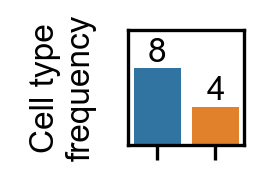

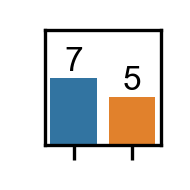

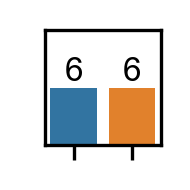

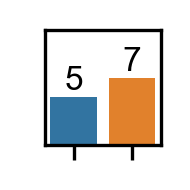

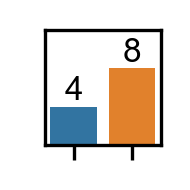

In [20]:
for reg in range(5):
    
    fig, ax = pyplot.subplots(figsize=(0.5, 0.5))

    sns.barplot(data=df_proportions.iloc[reg].to_frame().reset_index(), x='index', y=reg)
    if reg == 0:
        pyplot.ylabel("Cell type\nfrequency", **{'fontname':'Arial', 'size':8})
    else:
        pyplot.ylabel("")
    pyplot.xlabel("")
    pyplot.gca().axes.xaxis.set_ticklabels([])
    pyplot.yticks([], [])
    ax.set_ylim(0, 12)

    for i, (ind, val) in enumerate(df_proportions.iloc[reg].to_frame().reset_index().values):
        pyplot.annotate(val, xy=(i, val), ha='center', va='bottom', **{'fontname':'Arial', 'size':8})

    pyplot.savefig(f"cell_type_freq_reg{reg}.svg", bbox_inches="tight")

In [10]:
df_motif_freq = pd.DataFrame(motif_freq, columns=['A', 'B'])
df_motif_freq

,A,B
0,4,0
1,3,1
2,2,2
3,1,3
4,0,4


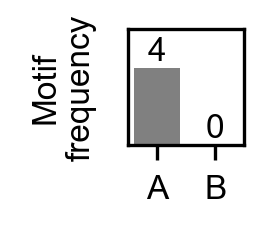

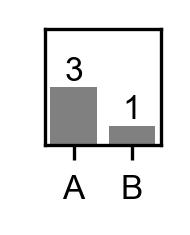

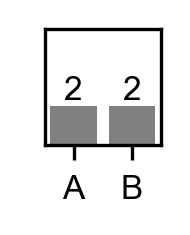

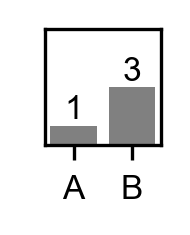

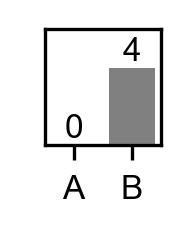

In [22]:
for reg in range(5):
    
    fig, ax = pyplot.subplots(figsize=(0.5, 0.5))

    sns.barplot(data=df_motif_freq.iloc[reg].to_frame().reset_index(), x='index', y=reg, color='gray')
    if reg == 0:
        pyplot.ylabel("Motif\nfrequency", **{'fontname':'Arial', 'size':8})
    else:
        pyplot.ylabel("")
    pyplot.xlabel("")
    pyplot.xticks(**{'fontname':'Arial', 'size':8})
    pyplot.yticks([], [])
    ax.set_ylim(0, 6)

    for i, (ind, val) in enumerate(df_motif_freq.iloc[reg].to_frame().reset_index().values):
        pyplot.annotate(val, xy=(i, val), ha='center', va='bottom', **{'fontname':'Arial', 'size':8})

    pyplot.savefig(f"motif_freq_reg{reg}.svg", bbox_inches="tight")